# Name: Nikita Kodam
# Task 2: To Explore Supervised Machine Learning
## Objective :
To predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied.
## Problem Statement: 
What will be the predicted score if a student study for 9.25 hrs in a day?

### Imporing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn import metrics  
from scipy import stats


### Data Importing

In [2]:
data_import= "http://bit.ly/w-data"
data=pd.read_csv(data_import)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Summary Statistics

In [3]:
df=pd.DataFrame(data)
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


### Data Visualization

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


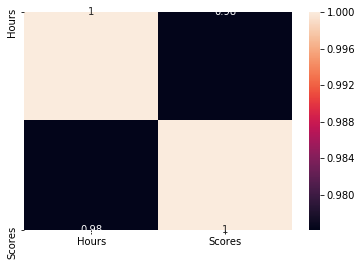

In [4]:
corrMatrix= df.corr()
print(corrMatrix)
sn.heatmap(corrMatrix,annot=True)
plt.show()

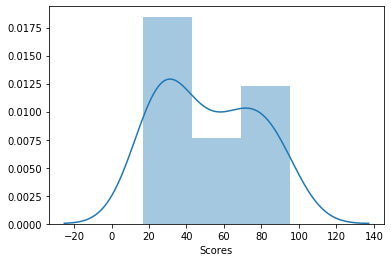

In [5]:
sn.distplot(data['Scores'])

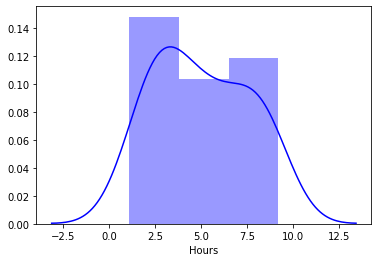

In [6]:
sn.distplot(data['Hours'],color='blue')

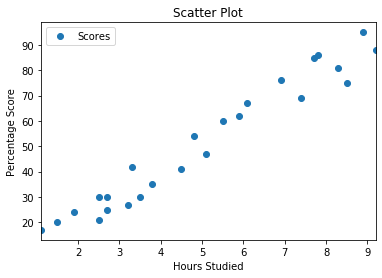

In [7]:
data.plot(x='Hours', y='Scores', style='o',)  
plt.title('Scatter Plot')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

##### From the above plot we see that there is a positive relationship between number of hours studied and percentage score.


### Spliting data into training and testing sets
 First we divide the data into inputs(attribute) and outputs(Label)

In [8]:
X = data.iloc[:, :-1].values 
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [9]:
y = data.iloc[:, 1].values  
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Training the Algorithm

In [13]:
regressor= LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete successfully")

Training complete successfully


#### Plotting Regression Line

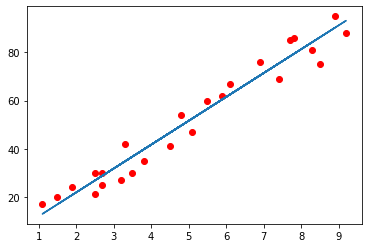

In [14]:
line =regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color='red')
plt.plot(X, line);
plt.show()

### Prediction Making

In [15]:
print(X_test) # Testing data - In Hours

y_pred = regressor.predict(X_test) # Predicting the scores
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


### Comparing Actual Vs Predicted Values

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Bar plot

Text(0, 0.5, 'Scores')

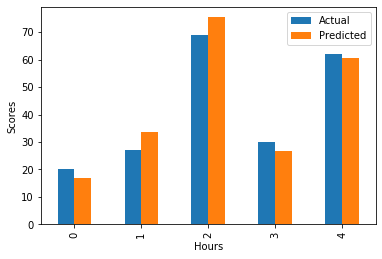

In [17]:
df.plot(kind='bar')
plt.xlabel('Hours')
plt.ylabel('Scores')

### Here we have to predict score if student study for 9.25 hrs in a day

In [19]:
hours = float(input('Enter the no of hours:'))
own_pred =model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Enter the no of hours:9.25
No of Hours = 9.25
Predicted Score = 93.69173248737538


### Evaluating the Model Accuracy
Using Mean Square Error and R-square


In [20]:
#Mean Square Error
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [21]:
#R-square value
slope,intercept,r,p,std_err=stats.linregress(y_test,y_pred)
print('R-squared Value:',r)

R-squared Value: 0.9806835759589493


##### Here R-squared value is 98%, means that model explains 98% of the variability in the dependent variable by the independent variable.

# Thank You